# Markov Decision Process (MDP)

A **Markov Decision Process (MDP)** is a mathematical model for sequential decision-making in situations where outcomes are partly random and partly under the control of a decision maker. MDPs are used to determine the best action for an agent to take in a given state, considering the current environment and the sequential nature of decision making. They find applications across various fields such as robotics, economics, manufacturing, and particularly in artificial intelligence for probabilistic planning and reinforcement learning.


## Fundamentals of MDP

MDPs are characterized by four main components:

- **States (S):** The set of all possible states in which the agent can be.
- **Actions (A):** The set of all actions the agent can take.
- **Transition Probabilities (P):** $P(s_{t+1} | s_t, a_t)$, the probability of moving from state $s_t$ to state $s_{t+1}$ after taking action $a_t$.
- **Rewards (R):** The immediate reward received after transitioning from one state to another state as a result of an action.

MDPs can be classified into finite, infinite, continuous, or discrete types based on the state and action spaces and the decision-making frequency.


## Markov Property

The **Markov Property** states that the future state depends only on the current state and not on the sequence of events that preceded it. Mathematically, it is expressed as:

$$P(s_{t+1} | s_t) = P(s_{t+1} | s_1, s_2, ..., s_t)$$

This property simplifies the analysis by focusing only on the current state to predict the future state, disregarding the past states.


## Policy and Value Function

- **Policy (π):** A policy defines the agent's action in a given state, aiming to maximize cumulative rewards. It is denoted as $\pi(s) \rightarrow a$, mapping states to actions.

- **Value Function (V):** The value function $V(s)$ estimates the expected return (total discounted rewards) from state $s$ under a policy $\pi$. It is crucial for evaluating the quality of a policy.

The **Bellman Equation** represents the value function as:

$$V^\pi(s) = R(s) + \gamma \sum_{s'} P(s' | s, a) V^\pi(s')$$

where $\gamma$ is the discount factor, representing the importance of future rewards.


## Optimal Policy and Value Function

The goal in MDP is to find an **optimal policy** $\pi^*$ that maximizes the expected return from any initial state. The optimal value function $V^*(s)$ represents the maximum value (expected return) that can be obtained from state $s$ under the best policy.

The optimal value function satisfies the **Bellman Optimality Equation**:

$$V^*(s) = \max_a \left(R(s, a) + \gamma \sum_{s'} P(s' | s, a) V^*(s')\right)$$

Finding the optimal policy often involves iterative methods such as value iteration, policy iteration, or Q-learning.


## Example: Decision Making in Wildlife Management

Consider a scenario where a wildlife manager must decide on the deer population management in a forest. The decision involves whether to allow hunting to control the deer population and ensure ecological balance.

- **States:** The population levels of deer (e.g., empty, low, medium, high).
- **Actions:** Decisions on whether to allow hunting (e.g., go_hunt, no_hunting).
- **Rewards:** Based on the ecological balance and economic impact (e.g., fines for over-hunting, income from hunting licenses).
- **Transitions:** Changes in deer population based on actions taken.

This real-world problem can be modeled as an MDP to determine the optimal hunting policy that balances ecological and economic objectives.


In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# States: 0 = low, 1 = medium, 2 = high
states = [0, 1, 2]

# Actions: 0 = no_hunting, 1 = go_hunt
actions = [0, 1]

# Transition Probabilities: P[s][a][s']
# Assuming deterministic transitions for simplicity
P = np.array([
    # From low state
    [[0.2, 0.8, 0.0],  # no_hunting: 20% stay low, 80% go to medium, 0% go to high
     [1.0, 0.0, 0.0]], # go_hunt: 100% stay low, 0% go to medium, 0% go to high
    # From medium state
    [[0.1, 0.8, 0.1],  # no_hunting: 10% go to low, 80% stay medium, 10% go to high
     [0.5, 0.5, 0.0]], # go_hunt: 50% go to low, 50% stay medium, 0% go to high
    # From high state
    [[0.0, 0.1, 0.9],  # no_hunting: 0% go to low, 10% go to medium, 90% stay high
     [0.1, 0.3, 0.6]]  # go_hunt: 10% go to low, 30% go to medium, 60% stay high
])


# Rewards: R[s][a]
# Rewards for actions in each state
R = np.array([
    [2, -1],  # low
    [2, 5],   # medium
    [2, 10]   # high
])

# Discount factor
gamma = 0.9


In [28]:
def value_iteration(P, R, states, actions, gamma, threshold=0.001):
    V = np.zeros(len(states))  # Initial value for all states
    policy = np.zeros(len(states), dtype=int)
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([sum([P[s][a][s_next]*(R[s][a] + gamma*V[s_next]) for s_next in states]) for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    for s in states:
        policy[s] = np.argmax([sum([P[s][a][s_next]*(R[s][a] + gamma*V[s_next]) for s_next in states]) for a in actions])
    return policy, V

policy, V = value_iteration(P, R, states, actions, gamma)
print("Optimal Policy:", policy)
print("Value Function:", V)


Optimal Policy: [0 1 1]
Value Function: [37.00233036 39.36484467 52.08318496]


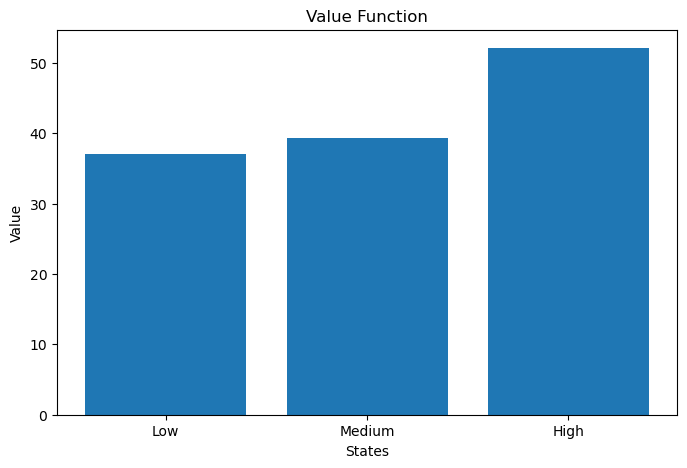

In [29]:
def plot_value_function(V, states):
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(states)), V, tick_label=["Low", "Medium", "High"])
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.title('Value Function')
    plt.show()

plot_value_function(V, states)

In [64]:
def generate_trajectory_with_rewards(start_state, P, R, N, policy=None):
    trajectory = []
    current_state = start_state
    cumulative_reward = 0
    rewards = []

    for _ in range(N):
        if policy is not None:
            action = policy[current_state]
        else:
            action = np.random.choice(len(actions))

        next_state = np.random.choice(states, p=P[current_state][action])
        reward = R[current_state][action]
        cumulative_reward += reward
        rewards.append(cumulative_reward)

        trajectory.append((current_state, action, next_state, reward))
        current_state = next_state

    return trajectory, rewards

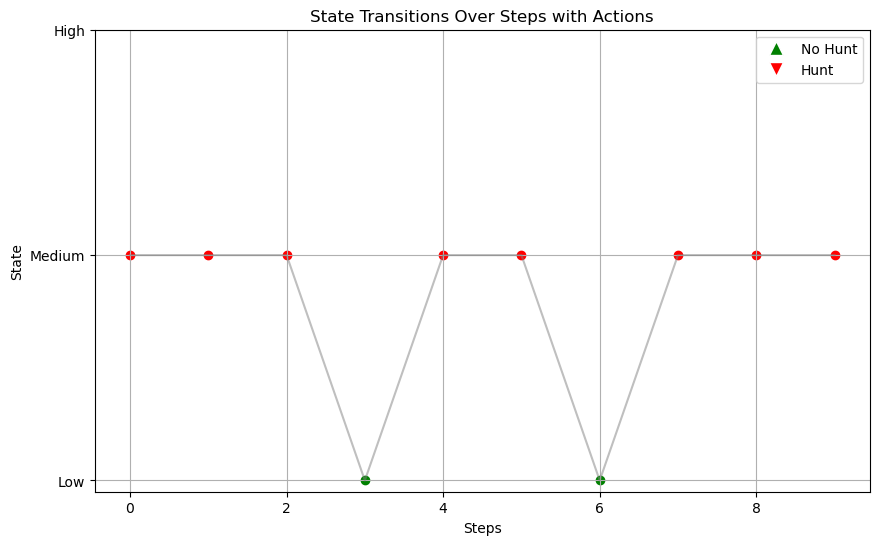

In [86]:
def plot_state_transitions(trajectory, N):
    states = [step[0] for step in trajectory]
    actions = [step[1] for step in trajectory]
    colors = ['green' if action == 0 else 'red' for action in actions]

    plt.figure(figsize=(10, 6))

    # Plot lines
    plt.plot(range(N), states, color='grey', alpha=0.5)  # Grey lines with lower opacity for visibility

    # Overlay colored dots for actions
    for i in range(N):
        plt.scatter(i, states[i], color=colors[i], label=f'Action: {"No Hunt" if actions[i] == 0 else "Hunt"}' if i == 0 else "")

    plt.xlabel('Steps')
    plt.ylabel('State')
    plt.title('State Transitions Over Steps with Actions')
    plt.yticks([0, 1, 2], ['Low', 'Medium', 'High'])

    # Create a custom legend
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='No Hunt'),
                       Line2D([0], [0], marker='v', color='w', markerfacecolor='red', markersize=10, label='Hunt')]
    plt.legend(handles=legend_elements)

    plt.grid(True)
    plt.show()

# Assuming the trajectory has already been generated
start_state = 1
trajectory, _ = generate_trajectory_with_rewards(start_state, P, R, N_steps, policy=policy)
plot_state_transitions(trajectory, N_steps)

Average final cumulative reward from state 0: 36.5
Average final cumulative reward from state 1: 42.5
Average final cumulative reward from state 2: 50.0


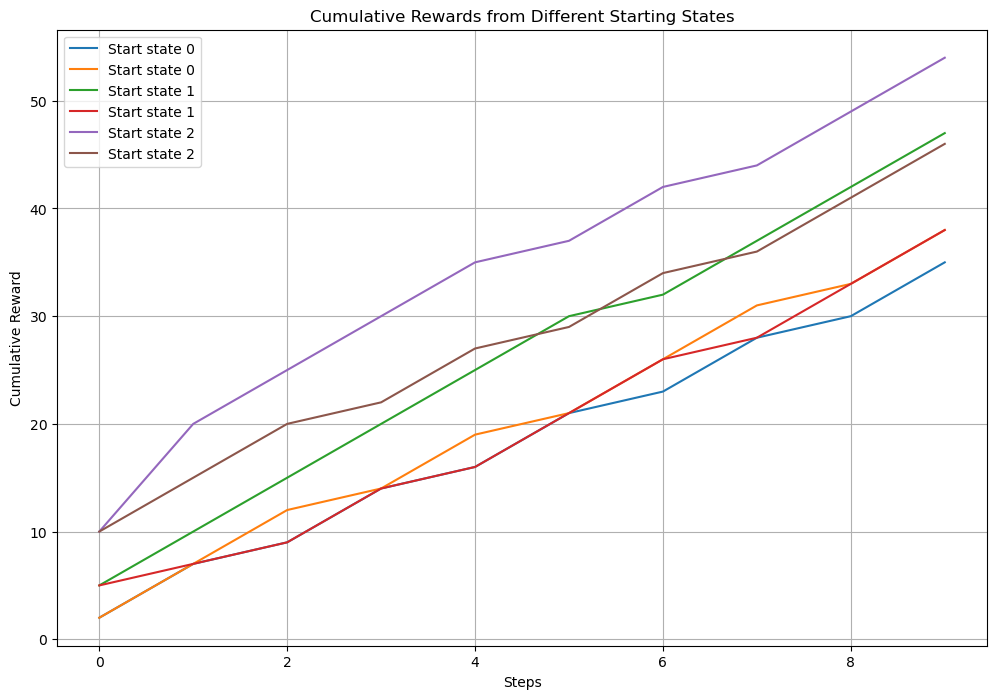

In [93]:
def plot_cumulative_rewards(P, R, states, N, num_trajectories=10, policy=None):
    plt.figure(figsize=(12, 8))
    for start_state in states:
        all_rewards = []
        for _ in range(num_trajectories):
            _, rewards = generate_trajectory_with_rewards(start_state, P, R, N, policy)
            all_rewards.append(rewards[-1])  # Get final cumulative reward for each trajectory
            plt.plot(rewards, label=f'Start state {start_state}')

        print(f"Average final cumulative reward from state {start_state}: {np.mean(all_rewards)}")

    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards from Different Starting States')
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparing cumulative rewards
plot_cumulative_rewards(P, R, states, N_steps, num_trajectories=2, policy=policy)

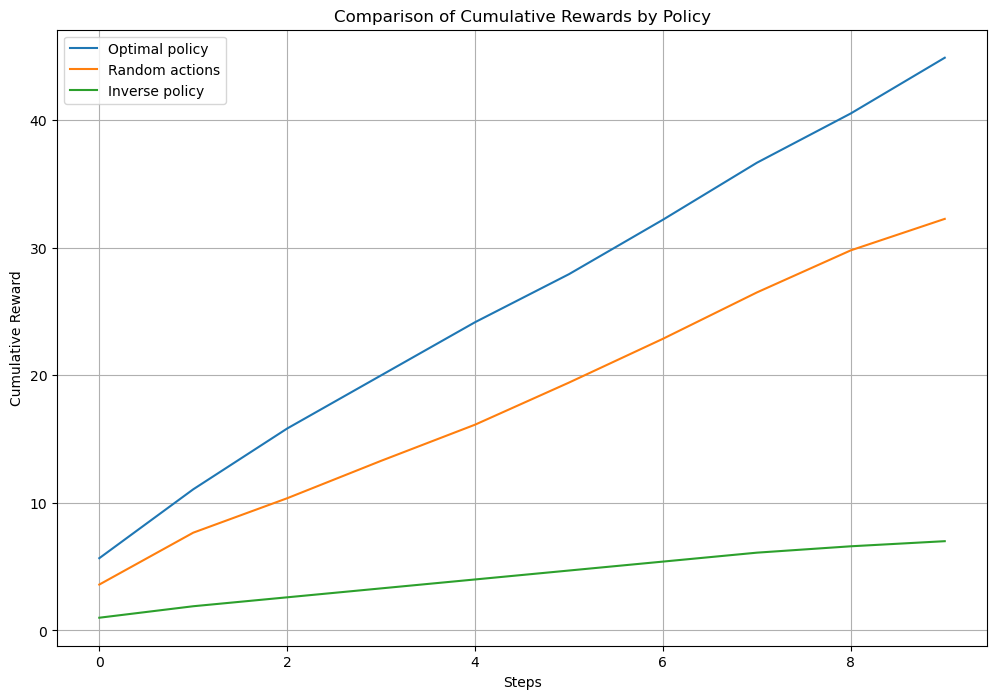

In [92]:
def plot_cumulative_rewards_comparison(P, R, states, N, num_trajectories=10, policy=None):
    plt.figure(figsize=(12, 8))

    # Define policies
    policies = {
        'Optimal policy': policy,
        'Random actions': None,
        'Inverse policy': [1 - p for p in policy]  # Assuming binary actions (0 and 1)
    }

    for policy_name, specific_policy in policies.items():
        total_rewards = np.zeros(N)  # Initialize total rewards for averaging

        for _ in range(num_trajectories):
            for start_state in states:
                _, rewards = generate_trajectory_with_rewards(start_state, P, R, N, specific_policy)
                total_rewards += np.array(rewards)  # Accumulate rewards

        # Average the rewards
        avg_rewards = total_rewards / (num_trajectories * len(states))

        # Plot
        plt.plot(avg_rewards, label=policy_name)

    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.title('Comparison of Cumulative Rewards by Policy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'policy' is defined as your optimal policy
# Ensure 'generate_trajectory_with_rewards' returns cumulative rewards correctly
plot_cumulative_rewards_comparison(P, R, states, N_steps, num_trajectories=10, policy=policy)